In [1]:
%matplotlib inline
import pykat
import pykat.optics.ABCD as abcd
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

                                              ..-
    PyKat 1.0.19          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
kat_code = """
l l1 1 0 n1 % laser with P=30W at the default frequency
s s1 1 1 n1 n2 % space of 1m length

bs b1 0.5 0.5 0 0 n2 nITMY nITMX nS1 % 50:50 beam splitter

s ly1 5.0279 nITMY nITMY1
s lx1 5.0082 nITMX nITMX1

m1 ITMY 0.014 $Mloss $phi_ITMY nITMY1 nITMYs1
s LYarm 3994.5 nITMYs1 nETMYs1
m1 ETMY 5u $Mloss $phi_ETMY nETMYs1 nETMYtrans

m1 ITMX 0.014 $Mloss $phi_ITMX nITMX1 nITMXs1
s LXarm 3994.5 nITMXs1 nETMXs1
m1 ETMX 5u $Mloss $phi_ETMX nETMXs1 nETMXtrans

s s2 1 1 nS1 nout

pd1 South $fs nout % photo detector in South port
pd1 pdinp $fs n1 % photo detector in South port

attr ITMY Rc -1934
attr ETMY Rc 2245

attr ITMX Rc -1934
attr ETMX Rc 2245

const Mloss 0
const phi_ITMX 0
const phi_ITMY 0
const phi_ETMX 0
const phi_ETMY 0

cav cavXARM ITMX nITMXs1 ETMX nETMXs1
cav cavYARM ITMY nITMYs1 ETMY nETMYs1

maxtem 4
"""

vary_end = """
xaxis ETMX phi lin -360 360 100 % changing the microscopic position of ETMX
"""

darm_commands = """

attr ITMX mass 40 zmech sus
attr ITMY mass 40 zmech sus
attr ETMX mass 40 zmech sus
attr ETMY mass 40 zmech sus

tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1 # Guess for suspension Q factor

fsig darm  ETMX 1 0 1
fsig darm2 ETMY 1 180 1

qnoisedS NSR_with_RP 1 $fs nout

xaxis darm f log 5 50k 1000
yaxis lin re:im
"""

In [3]:
out_list = []

intervals = 5

for i in range(1,intervals+1,1):
    offset = float(i)/intervals

    basekat = pykat.finesse.kat() 
    basekat.parseCommands(kat_code)
    basekat.parseCommands(vary_end)
    basekat.undumpNodes() #undump the vacuum nodes to get the right quantum noise
    kat=basekat.deepcopy() #copy kat code
    kat.verbose = False


    R = 1.0 - offset 
    T = offset
    L = 1.0 - R - T
    
    kat.ITMX.R.value = R
    kat.ITMX.L.value = L
    kat.ITMX.T.value = T

    kat.ITMY.R.value = R
    kat.ITMY.L.value = L
    kat.ITMY.T.value = T

    out = kat.run()
    out_list.append(out['South'])


--------------------------------------------------------------
Error from pykat:
Could not find the finesse executable 'kat' in 'C:\Finesse',or
you do not have the permissions to run it.
--------------------------------------------------------------



SystemExit: 1

C:\Users\tvo88\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


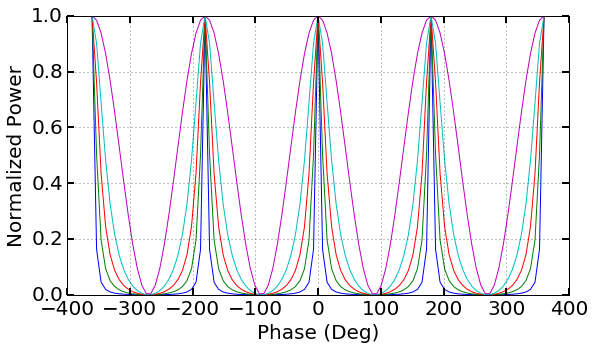

In [5]:
pl.figure(figsize=(9, 5), dpi=80)


pl.subplot(111)

for i in range(len(out_list)):
    pl.plot(out.x,out_list[i])

#pl.plot(out.x,out['pdinp'])

pl.legend(fontsize=15)

pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("Normalized Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()